Patika Example Project

Hasan Furkan Çolak

In [1]:
#inialize libraries and files
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

%matplotlib inline

PATH = "/media/hasanfurkan/Data/PY/data_projects/world_happiness/"
df_2015 = pd.read_csv(f"{PATH}2015.csv")
df_2016 = pd.read_csv(f"{PATH}2016.csv")
df_2017 = pd.read_csv(f"{PATH}2017.csv")
df_2018 = pd.read_csv(f"{PATH}2018.csv")
df_2019 = pd.read_csv(f"{PATH}2019.csv")


In [2]:
#check for null data
df_2015.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

<AxesSubplot:xlabel='Happiness Score', ylabel='Country'>

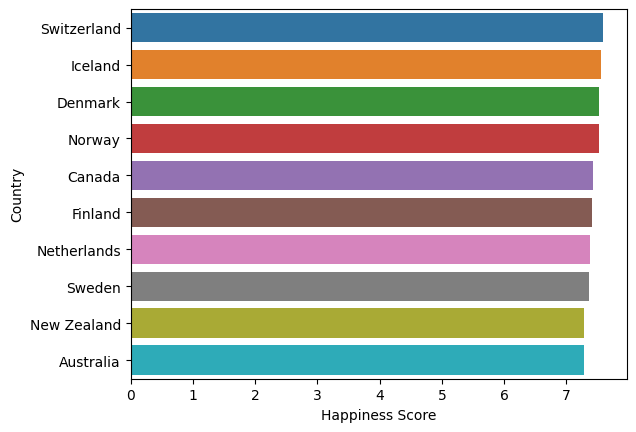

In [3]:
#happiest countries
sb.barplot(y = df_2015["Country"][:10],x=df_2015["Happiness Score"][:10])

<AxesSubplot:xlabel='Family', ylabel='Country'>

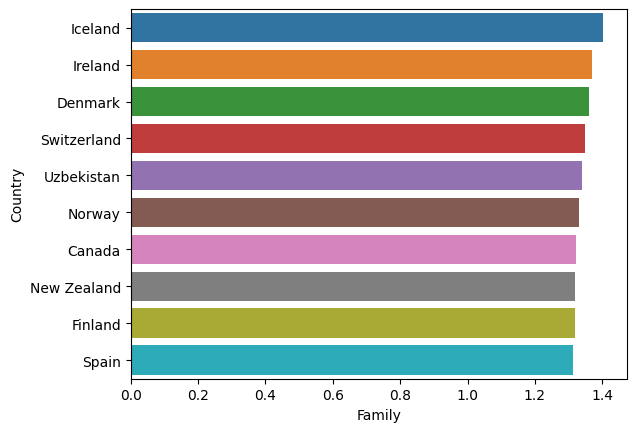

In [4]:
df_2015_family = df_2015.sort_values(["Family"],ascending=False)
sb.barplot(y = df_2015_family["Country"][:10],x=df_2015_family["Family"][:10])

<AxesSubplot:xlabel='Health (Life Expectancy)', ylabel='Country'>

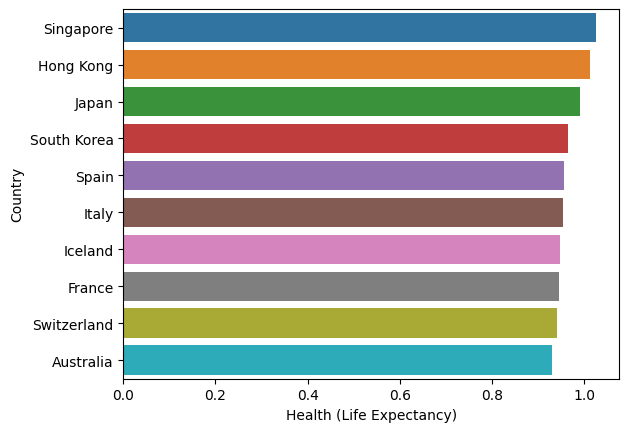

In [5]:
df_2015_health = df_2015.sort_values(["Health (Life Expectancy)"],ascending=False)
sb.barplot(y = df_2015_health["Country"][:10],x=df_2015_health["Health (Life Expectancy)"][:10])

<AxesSubplot:xlabel='Freedom', ylabel='Country'>

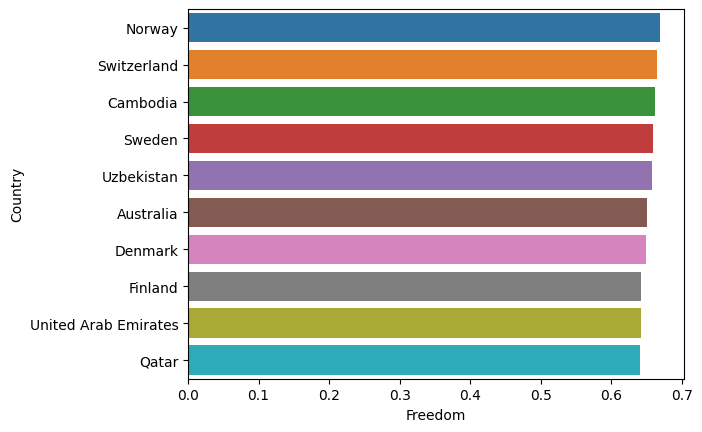

In [6]:
df_2015_freedom = df_2015.sort_values(["Freedom"],ascending=False)
sb.barplot(y = df_2015_freedom["Country"][:10],x=df_2015_freedom["Freedom"][:10])

<AxesSubplot:xlabel='Trust (Government Corruption)', ylabel='Country'>

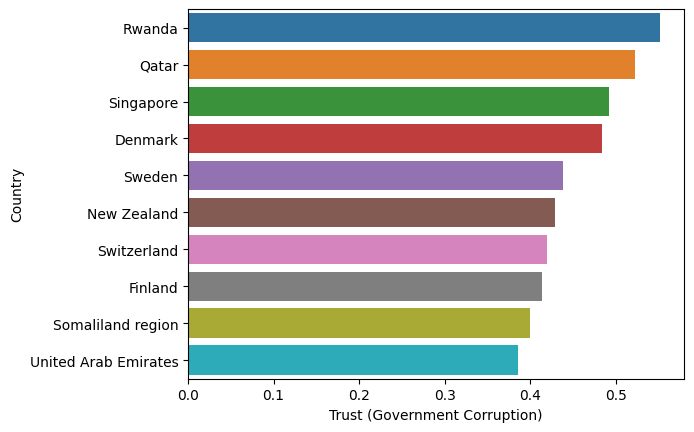

In [7]:
df_2015_trust = df_2015.sort_values(["Trust (Government Corruption)"],ascending=False)
sb.barplot(y = df_2015_trust["Country"][:10],x=df_2015_trust["Trust (Government Corruption)"][:10])

<AxesSubplot:xlabel='Generosity', ylabel='Country'>

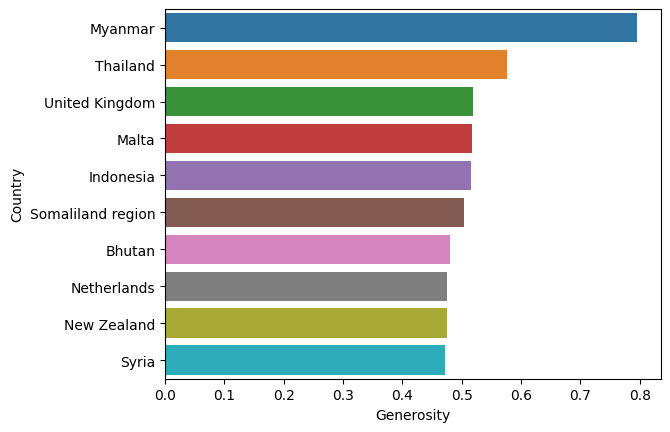

In [8]:
df_2015_Generosity = df_2015.sort_values(["Generosity"],ascending=False)
sb.barplot(y = df_2015_Generosity["Country"][:10],x=df_2015_Generosity["Generosity"][:10])

Happiness Score Change of Countries Trough Years

In [9]:
#merge the tables for happinies score copmarasion
merged_inner1 = pd.merge(left=df_2015, right=df_2016, left_on='Country', right_on='Country')
df_change1 = merged_inner1[["Country","Happiness Score_x","Happiness Score_y"]]

df_2017.rename(columns={"Happiness.Score":"Happiness Score"},inplace=True)
df_2018.rename(columns={"Country or region":"Country","Score":"Happiness Score"},inplace=True)
df_2019.rename(columns={"Country or region":"Country","Score":"Happiness Score"},inplace=True)

merged_inner2 = pd.merge(left=df_2017, right=df_2018, left_on='Country', right_on='Country')
df_change2 = merged_inner2[["Country","Happiness Score_x","Happiness Score_y"]]

merged_inner3 = pd.merge(left=df_change1, right=df_change2, left_on='Country', right_on='Country')
df_change3 = merged_inner3[["Country","Happiness Score_x_x","Happiness Score_y_x","Happiness Score_x_y","Happiness Score_y_y"]]
df_change3.rename(columns={
    "Happiness Score_x_x":"2015",
    "Happiness Score_y_x":"2016",
    "Happiness Score_x_y":"2017",
    "Happiness Score_y_y":"2018",
},inplace=True)

final_merge = pd.merge(left=df_change3,right=df_2019,left_on="Country",right_on="Country")
final_merge.rename(columns={"Happiness Score":"2019"},inplace=True)
df_final_change = final_merge[["Country","2015","2016","2017","2018","2019"]]
df_final_change.index = df_final_change["Country"]
df = df_final_change.head(5)

<AxesSubplot:ylabel='Country'>

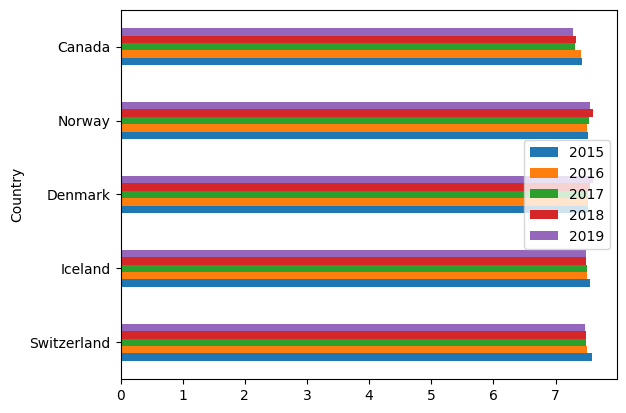

In [10]:
df.index = df["Country"]
df.plot.barh()

Finding Happiness Score Change of a Country Trough Years

<AxesSubplot:ylabel='Country'>

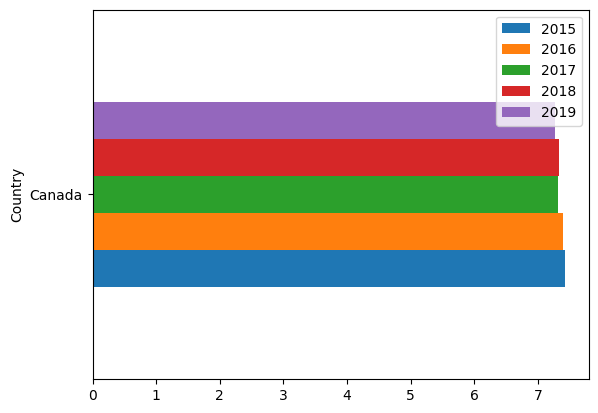

In [11]:
name = input()
df_years = df_final_change[df_final_change.Country==name]
df_years.plot.barh()